# Perlin noise simulations

In [7]:
import os
import pickle
import numpy as np
import pandas as pd

from tqdm import tqdm, trange

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.gridspec as gridspec

from IPython.display import display

In [8]:
out = './out/'
data = './data/'

### Just some matplotlib and seaborn parameter tuning

In [9]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')
rocket_cmap = sns.color_palette('rocket', as_cmap=True)

In [13]:
coords = pd.read_csv(data + 'coordinates.txt',
                     names=['x', 'y'])
df = pd.read_csv(data + 'gradient_field.txt',
                 names=['x', 'y'])

In [11]:
# Size of grid
N_x = 20
N_y = 10

# Create coord. system
xc = np.arange(0,N_x,1)
yc = np.arange(0,N_y,1)

# Load in gradients
x = df.x.values
y = df.y.values

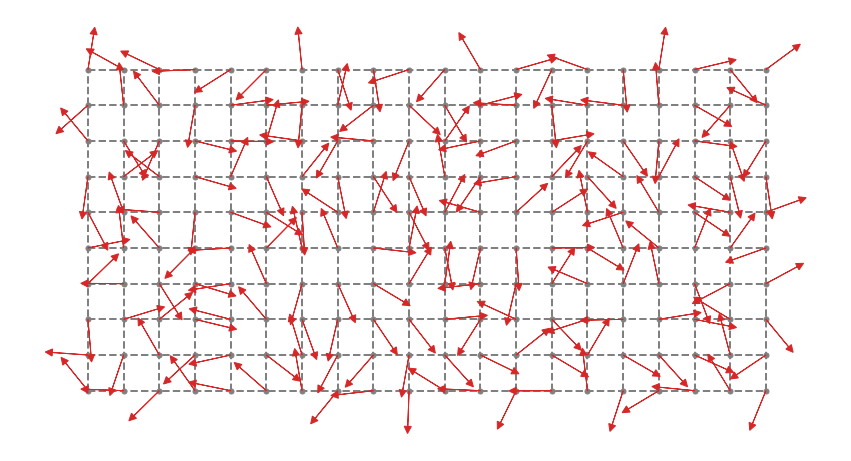

In [12]:
fig, axes = plt.subplots(figsize=(15,15))
axes.set_aspect('equal')
axes.axis('off')

for i in range(N_x):
    for j in range(N_y):
        k = i * N_y + j
        axes.arrow(x=xc[i], y=yc[j], dx=x[k], dy=y[k],
                   color='tab:red', head_width=0.2, head_length=0.2, zorder=4)
        axes.scatter(xc[i], yc[j],
                     color='grey', s=(5)**2, zorder=3)

for i in range(N_x):
    axes.plot([i, i], [0, N_y-1],
              color='grey', ls='--', lw=2)
for i in range(N_y):
    axes.plot([0, N_x-1], [i, i],
              color='grey', ls='--', lw=2)

plt.show()